In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv('ENB2012_data.csv')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
X = dataset.ix[:, 'X1':'X8']
y = dataset.ix[:,'Y1':'Y2']
X.head()

/home/samuel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/samuel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


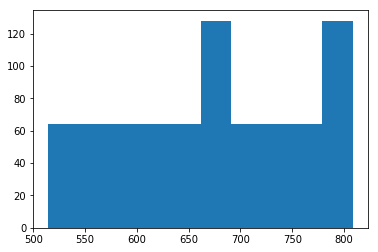

In [88]:
y.head()
plt.hist(X.values[:,1], bins=10)
plt.show()

In [7]:
def plotCorr(X, y, column_names, res, y_predicts=None):
    # Plot outputs
    # print((x_vals[0].shape, y_test[0].shape))
    num_of_features = X.shape[1]
    height = num_of_features*5
    # if y_predicts is not None:
    #     height *= 2
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
        y_vals = y
    else:
        X_vals = X.values
        y_vals = y.values

    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
                                                         " values for " + column_names[col])
        plt.scatter(X_vals[:, col], y_vals[:, res], color='black')
        index+=1

        if y_predicts is not None:
            plt.subplot(num_of_features, 2, index).set_title("Predicted Y" + str(res + 1) + 
                                                             " values for " + column_names[col])
            plt.scatter(X_vals[:, col], y_predicts[:,res], color='blue')
            index+=1
    plt.show()

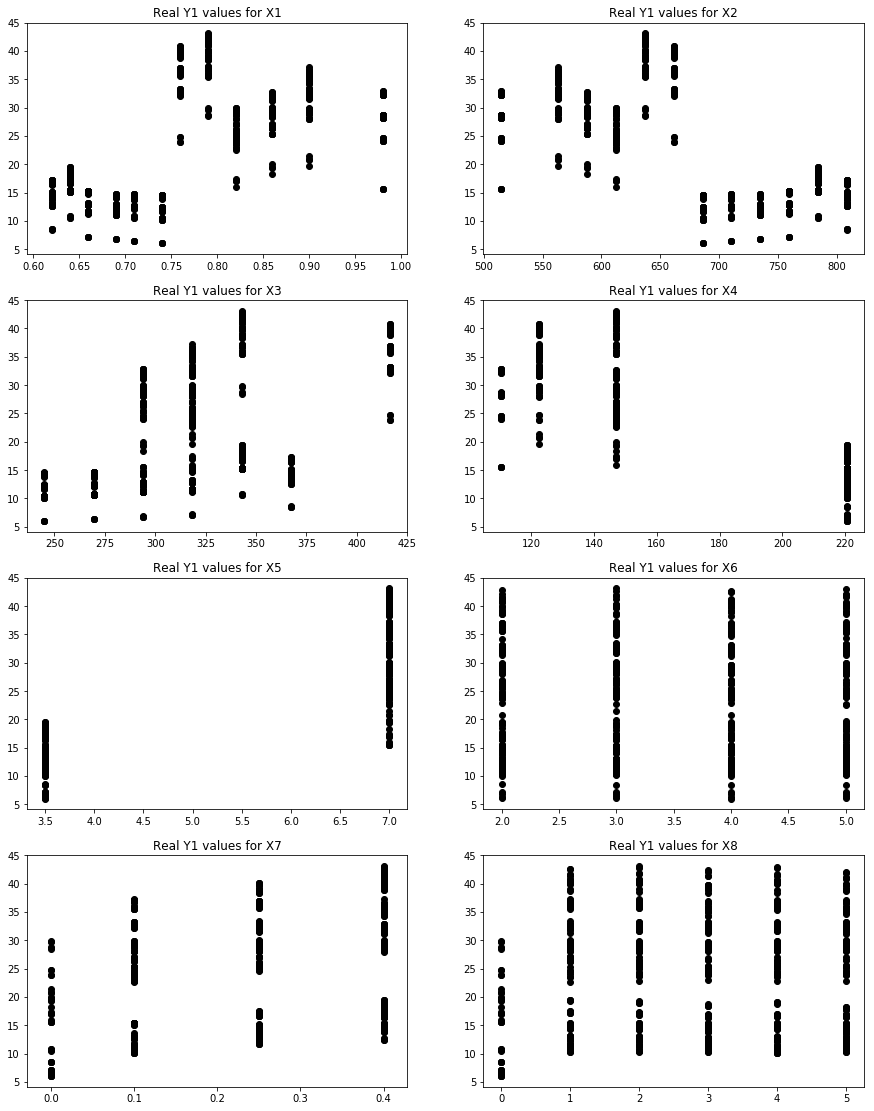

In [9]:
plotCorr(X, y, X.columns, 0)

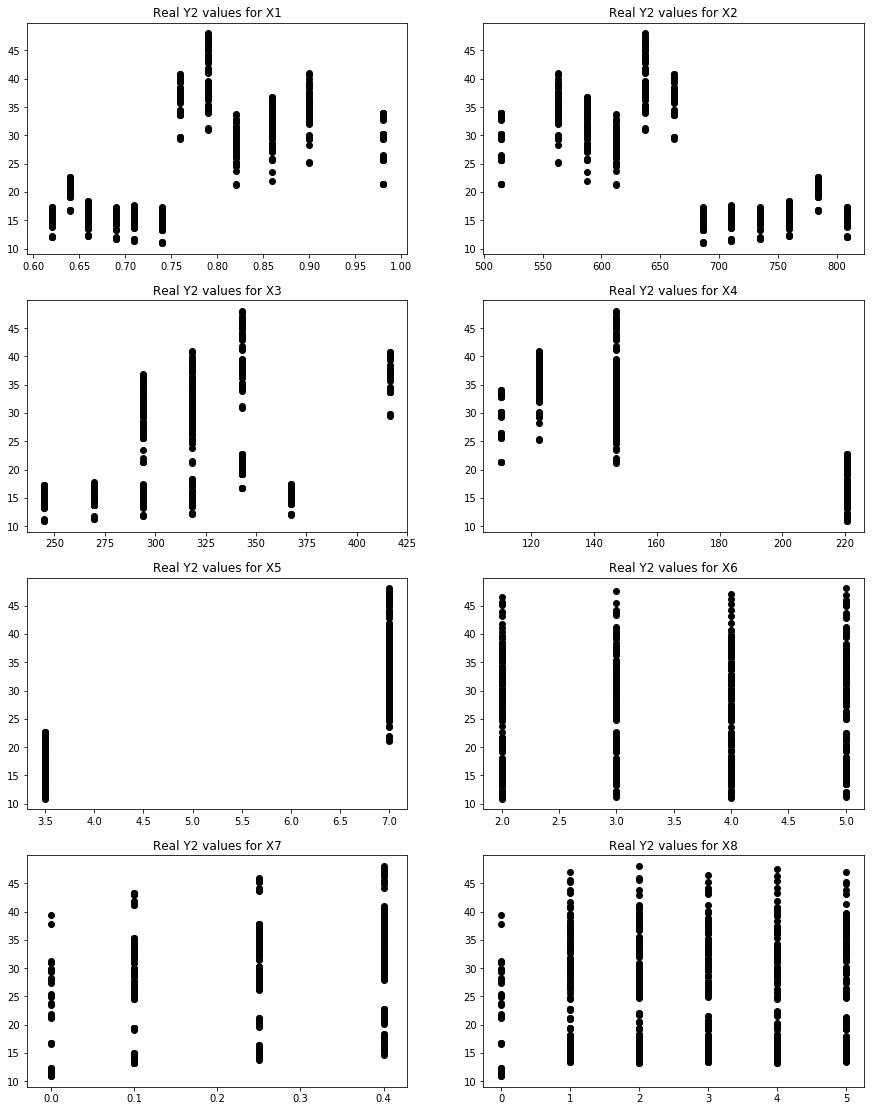

In [10]:
plotCorr(X, y, X.columns, 1)

In [11]:
def getPearsonCorrs(X, y):
    num_of_features = X.shape[1]
    for res in range(0,2):
        print("Pearson's correlation for all features and Y" + str(res + 1))
        for col in range(0,num_of_features):
            print(X.columns[col] + " " + str(pearsonr(X.values[:,col], y.values[:,res])))
        print('\n')


In [12]:
getPearsonCorrs(X, y)

Pearson's correlation for all features and Y1
X1 (0.6222721790646626, 1.591273699712196e-83)
X2 (-0.6581202267776216, 1.6869072902145291e-96)
X3 (0.4556711568983097, 1.221888688332329e-40)
X4 (-0.861828252905822, 4.914880966403297e-228)
X5 (0.8894306741007042, 1.1409232650148757e-262)
X6 (-0.002586533915638776, 0.9429492916262961)
X7 (0.2698409963206335, 2.795962177593103e-14)
X8 (0.08736759370846414, 0.015440000762164438)


Pearson's correlation for all features and Y2
X1 (0.6343390663353593, 1.0608759912584435e-87)
X2 (-0.6729989333544865, 2.0052123210798335e-102)
X3 (0.42711699766713346, 2.108196604342352e-35)
X4 (-0.862546603524974, 7.732002122017475e-229)
X5 (0.8957851688924501, 5.855770613016434e-272)
X6 (0.01428959757617023, 0.6925623867167605)
X7 (0.20750499116036222, 6.456865072123323e-09)
X8 (0.050525118805675666, 0.16187117468129736)




In [13]:
X_reduced = dataset[['X1','X2','X3','X4','X5','X7']]

In [60]:
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cross_val_score(lin_reg, X_train, y_train, cv=4, scoring="neg_mean_squared_error").mean()

-9.889141411890183

In [61]:
lin_reg = LinearRegression()
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_reduced, y, test_size=0.2)
cross_val_score(lin_reg, X_red_train, y_red_train, cv=4, scoring="neg_mean_squared_error").mean()

-9.57295961883573

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
y_minmax = min_max_scaler.fit_transform(y_train)
cross_val_score(lin_reg, X_minmax, y_minmax, cv=4, scoring="neg_mean_squared_error").mean()

/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


-0.00689948112548342

In [ ]:
(cross_val_score(lin_reg, X_minmax, y_minmax, cv=4, scoring="r2").mean(),
cross_val_score(lin_reg, X_train, y_train, cv=4, scoring="r2").mean())

In [19]:
normalizer = preprocessing.Normalizer()
X_norm = normalizer.fit_transform(X_train)
y_norm = normalizer.fit_transform(y_train)
cross_val_score(lin_reg, X_norm, y_norm, cv=4, scoring="r2").mean()

0.5642530997173109

In [75]:
st_scaler = preprocessing.StandardScaler()
X_st = st_scaler.fit_transform(X_train)
y_st = st_scaler.fit_transform(y_train)
ridge = Ridge()

ridge_score = cross_val_score(ridge, X_st, y_st, cv=4, scoring="r2").mean()
lin_reg_score = cross_val_score(lin_reg, X_st, y_st, cv=4, scoring="r2").mean()
(ridge_score.mean(), lin_reg_score.mean())

/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(0.8965269795167707, 0.8967437375228093)

In [76]:
from sklearn.linear_model import Ridge, SGDRegressor, Lasso
reg = RandomForestRegressor()
scores = cross_val_score(reg, X_reduced, y, cv=4, scoring='neg_mean_squared_error')
scores.mean()

/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-3.1764817078602574

In [21]:
reg = Lasso()
scores = cross_val_score(reg, X_reduced, y, cv=4, scoring='r2')
scores.mean()

0.7254500169893455

In [22]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
scores = cross_val_score(reg, X_reduced, y, cv=4)
scores.mean()

/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9631313930340655

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_red_train, y_red_train)
# y_test_norm = normalizer.fit_transform(y_test)
# X_test_norm = normalizer.fit_transform(X_test)
y_predicts = lin_reg.predict(X_red_test)
mean_squared_error(y_red_test, y_predicts)

9.73024792915676

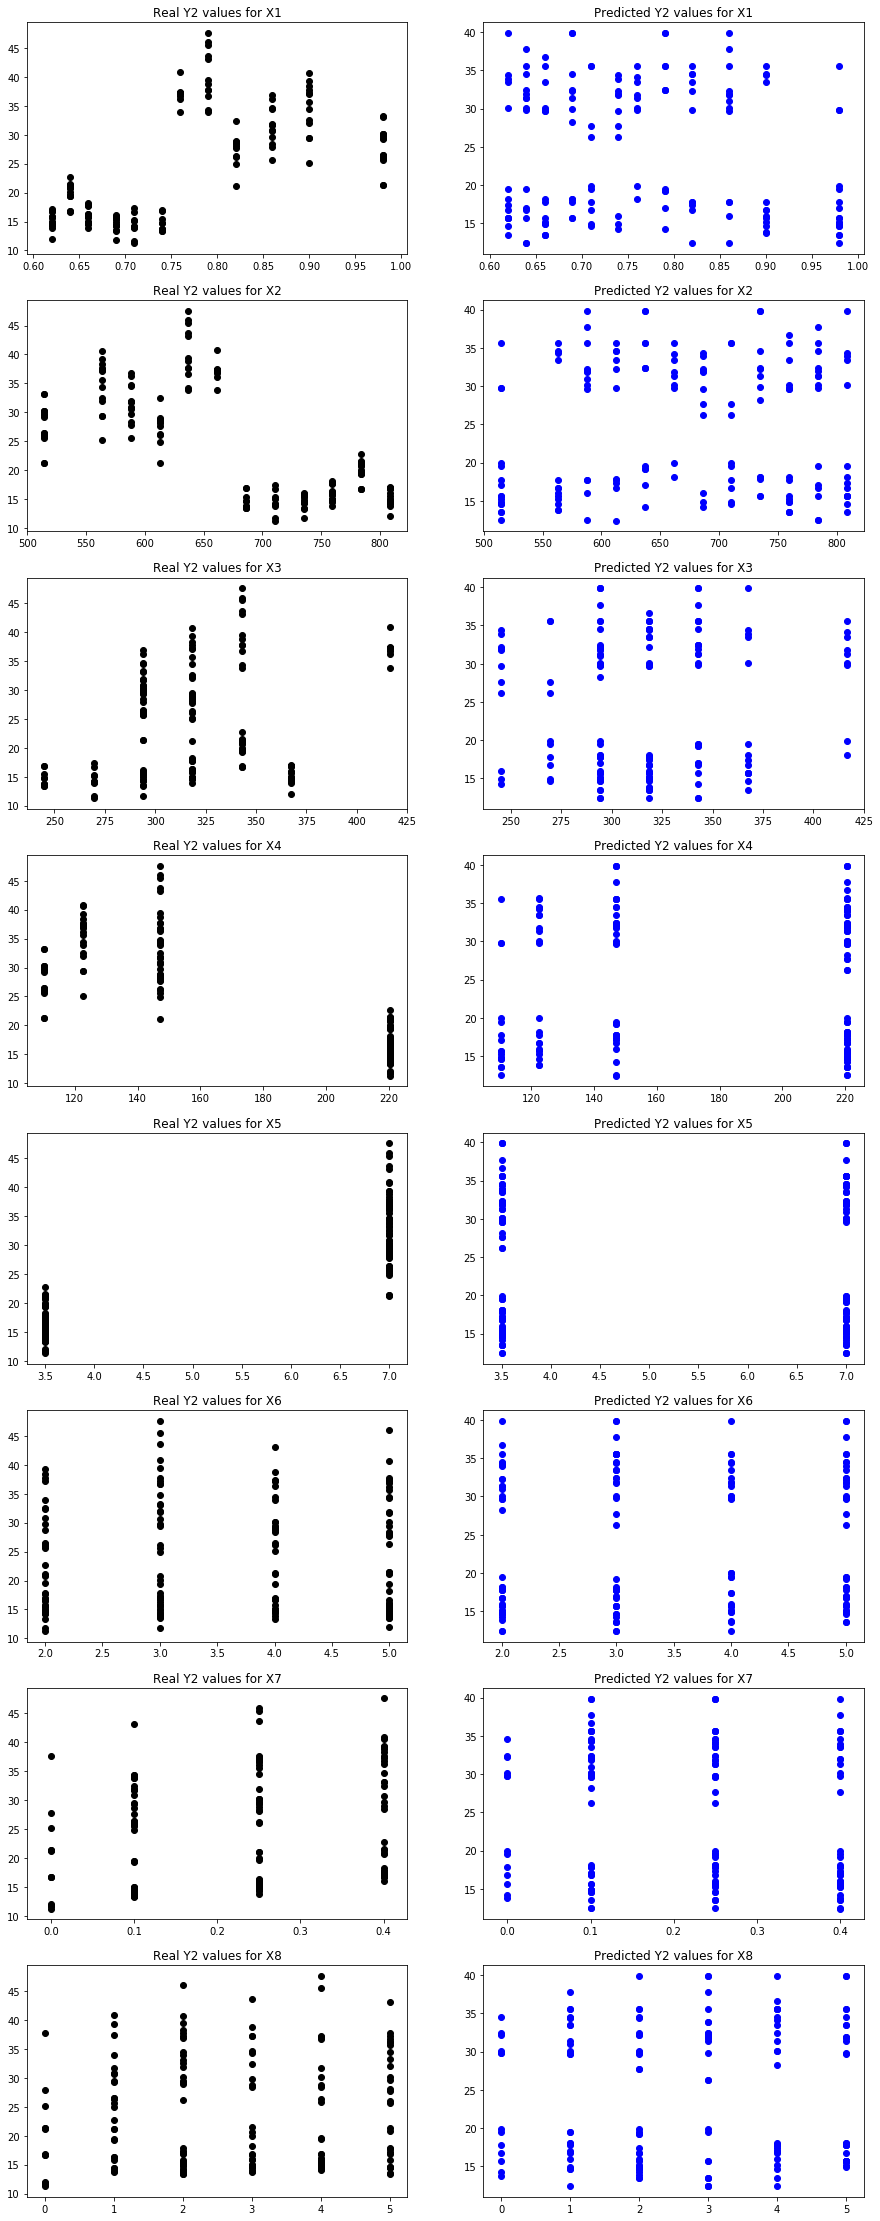

In [35]:
plotCorr(X_test, y_test, X_test.columns, 1, y_predicts)